In [1]:
import numpy as np
from scipy.integrate import solve_ivp

def projectile_quad_drag(t, s, g, m, c):
    """
    State s = [x, y, vx, vy]
    Drag: F_d = -c * |v| * v
    """
    x, y, vx, vy = s
    v = np.hypot(vx, vy)  # |v| = sqrt(vx^2 + vy^2)

    ax = -(c/m) * v * vx
    ay = -g - (c/m) * v * vy

    return [vx, vy, ax, ay]

def hit_ground_event(t, s, g, m, c):
    # event triggers when y = 0
    return s[1]

hit_ground_event.terminal = True     # stop integration
hit_ground_event.direction = -1      # only detect downward crossing

def simulate_range(v0=50.0, launch_deg=35.0, y0=0.0, g=9.81, m=1.0, c=0.02,
                   tmax=200.0, rtol=1e-8, atol=1e-10):
    theta = np.deg2rad(launch_deg)
    vx0 = v0 * np.cos(theta)
    vy0 = v0 * np.sin(theta)

    s0 = [0.0, y0, vx0, vy0]

    sol = solve_ivp(
        projectile_quad_drag,
        t_span=(0.0, tmax),
        y0=s0,
        args=(g, m, c),
        events=hit_ground_event,
        rtol=rtol,
        atol=atol,
        max_step=0.05  # helps event accuracy
    )

    if sol.t_events[0].size == 0:
        raise RuntimeError("Did not hit the ground within tmax; increase tmax.")

    tf = sol.t_events[0][0]
    xf = sol.y_events[0][0][0]  # x at impact
    return xf, tf, sol

if __name__ == "__main__":
    R, tf, sol = simulate_range(v0=50, launch_deg=35, y0=0, m=1.0, c=0.02)
    print(f"Range R = {R:.3f} m")
    print(f"Time of flight tf = {tf:.3f} s")


Range R = 66.839 m
Time of flight tf = 3.801 s


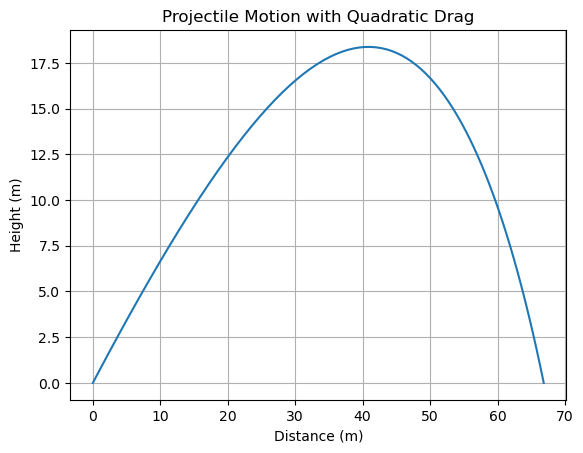

In [2]:
# plot the trajectory in 2 D
import matplotlib.pyplot as plt
plt.plot(sol.y[0], sol.y[1])
plt.title("Projectile Motion with Quadratic Drag")
plt.xlabel("Distance (m)")
plt.ylabel("Height (m)")
plt.grid()
plt.show()
